In [83]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [84]:
sns.set(style='whitegrid')

### Data Preparation

In [91]:
diamonds = sns.load_dataset('diamonds')

In [92]:
diamonds=diamonds[(diamonds["color"]=='G') & (diamonds['carat']<1.75)][['carat','cut','price']].reset_index(drop=True)

In [93]:
diamonds['cut'].unique()

['Very Good', 'Ideal', 'Premium', 'Good', 'Fair']
Categories (5, object): ['Very Good', 'Ideal', 'Premium', 'Good', 'Fair']

In [94]:
diamonds.head()

,carat,cut,price
0,0.23,Very Good,354
1,0.23,Ideal,404
2,0.28,Ideal,553
3,0.31,Very Good,553
4,0.31,Premium,553


### Exploration

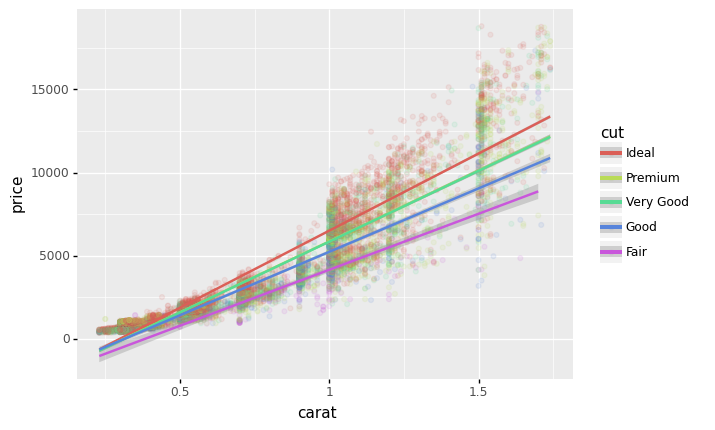

<ggplot: (-9223371864234953860)>

In [95]:
(ggplot(diamonds, aes(x='carat', y='price',group='cut', color='cut')) \
        +geom_point(alpha=0.1)
         +geom_smooth() )

### one-hot coding

In [96]:
diamonds = pd.get_dummies(diamonds)

diamonds

,carat,price,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,0.23,354,0,0,1,0,0
1,0.23,404,1,0,0,0,0
2,0.28,553,1,0,0,0,0
3,0.31,553,0,0,1,0,0
4,0.31,553,0,1,0,0,0
...,...,...,...,...,...,...,...
10964,0.80,2749,1,0,0,0,0
10965,0.71,2751,1,0,0,0,0
10966,0.83,2751,1,0,0,0,0
10967,0.80,2753,0,0,0,1,0


In [99]:
columns_name = diamonds.columns
columns_name

Index(['carat', 'price', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'cut_Good', 'cut_Fair'],
      dtype='object')

In [101]:
diamonds.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [102]:
diamonds

,carat,price,cut_Ideal,cut_Premium,cut_Very_Good,cut_Good,cut_Fair
0,0.23,354,0,0,1,0,0
1,0.23,404,1,0,0,0,0
2,0.28,553,1,0,0,0,0
3,0.31,553,0,0,1,0,0
4,0.31,553,0,1,0,0,0
...,...,...,...,...,...,...,...
10964,0.80,2749,1,0,0,0,0
10965,0.71,2751,1,0,0,0,0
10966,0.83,2751,1,0,0,0,0
10967,0.80,2753,0,0,0,1,0


### Linear Regression

In [110]:
import statsmodels.api as sm

X = diamonds.drop(['price','cut_Ideal'], axis=1)

Y = diamonds['price']

X = sm.add_constant(X)

lm = sm.OLS(Y,X).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:25:00   Log-Likelihood:                -94482.
No. Observations:               10969   AIC:                         1.890e+05
Df Residuals:                   10963   BIC:                         1.890e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2427.3831     29.684    -81.775

In [112]:
X

,const,carat,cut_Premium,cut_Very_Good,cut_Good,cut_Fair
0,1.0,0.23,0,1,0,0
1,1.0,0.23,0,0,0,0
2,1.0,0.28,0,0,0,0
3,1.0,0.31,0,1,0,0
4,1.0,0.31,1,0,0,0
...,...,...,...,...,...,...
10964,1.0,0.80,0,0,0,0
10965,1.0,0.71,0,0,0,0
10966,1.0,0.83,0,0,0,0
10967,1.0,0.80,0,0,1,0


In [113]:
pred = lm.predict(X)

In [116]:
lm_fitted = pd.DataFrame({'pred':pred, 'actual':Y })
lm_fitted

,pred,actual
0,-845.129685,354
1,-412.284068,404
2,25.780929,553
3,-144.225691,553
4,-142.062658,553
...,...,...
10964,4581.656894,2749
10965,3793.139900,2751
10966,4844.495891,2751
10967,3699.814127,2753


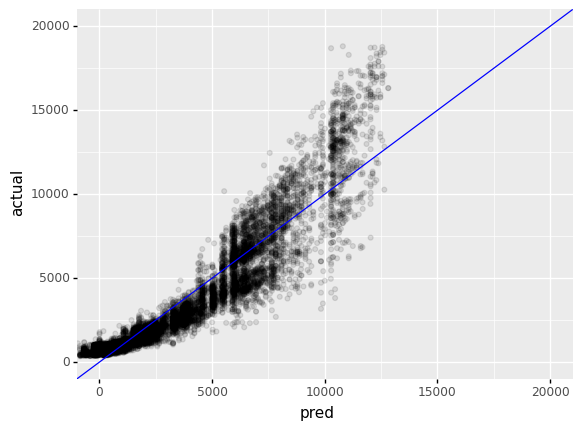

<ggplot: (-9223371864235414068)>

In [120]:
(ggplot(lm_fitted, aes(x='pred', y='actual')) \
        +geom_point(alpha=0.1)
         +geom_abline(slope = 1, intercept= 0, color ='blue', size =0.5)
         +coord_cartesian(xlim =[0,20000], ylim = [0,20000]))

### Side note

In [124]:
import statsmodels.api as sm
import numpy as np

X = diamonds.drop(['price','cut_Ideal'], axis=1)

Y = np.log(diamonds['price'])

X = sm.add_constant(X)

lm = sm.OLS(Y,X).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 2.467e+04
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:41:20   Log-Likelihood:                -1759.5
No. Observations:               10969   AIC:                             3531.
Df Residuals:                   10963   BIC:                             3575.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.9728      0.006    943.689

In [125]:
pred = lm.predict(X)

In [126]:
lm_fitted_log = pd.DataFrame({'pred':pred, 'actual':Y })
lm_fitted_log 

,pred,actual
0,6.458129,5.869297
1,6.544179,6.001415
2,6.668382,6.315358
3,6.656853,6.315358
4,6.649248,6.315358
...,...,...
10964,7.960090,7.918992
10965,7.736525,7.919720
10966,8.034611,7.919720
10967,7.845898,7.920447


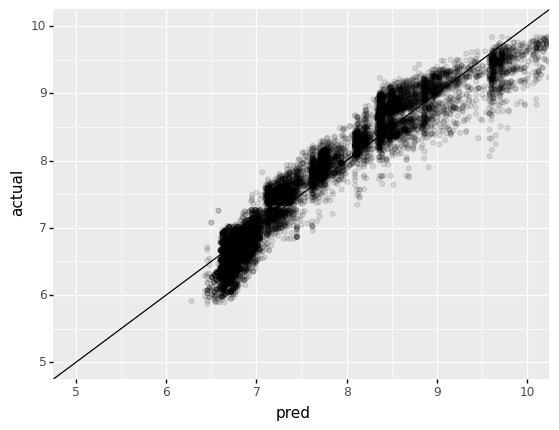

<ggplot: (-9223371864116412676)>

In [130]:
(ggplot(lm_fitted_log, aes(x='pred', y='actual')) \
        +geom_point(alpha=0.1)
        +geom_abline(slope =1, intercept =0)
        +coord_cartesian(xlim =[5,10], ylim = [5,10])
         )

### Depp Forward Network

In [140]:
X = diamonds.drop(['cut_Ideal','price'], axis=1).values

Y_actual = diamonds['price'].values

X.shape

(10969, 5)

In [141]:
Y.shape

(10969,)

In [191]:
from keras.models import Sequential
from keras.layers import Dense 


model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(5,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [192]:
model.compile(loss='mse', optimizer='adam')

In [193]:
history = model.fit(X,Y_actual, epochs=30, batch_size=16)

Epoch 1/30
686/686 [==============================] - 1s 590us/step - loss: 27191055.3130
Epoch 2/30
686/686 [==============================] - 0s 665us/step - loss: 20271352.3785
Epoch 3/30
686/686 [==============================] - 0s 652us/step - loss: 10845556.5328
Epoch 4/30
686/686 [==============================] - 0s 674us/step - loss: 8377327.6623
Epoch 5/30
686/686 [==============================] - 0s 672us/step - loss: 7479340.8937
Epoch 6/30
686/686 [==============================] - 0s 670us/step - loss: 6709493.4269
Epoch 7/30
686/686 [==============================] - 0s 634us/step - loss: 5685599.0411
Epoch 8/30
686/686 [==============================] - 0s 645us/step - loss: 4709518.9349
Epoch 9/30
686/686 [==============================] - 0s 666us/step - loss: 3721278.8228
Epoch 10/30
686/686 [==============================] - 0s 661us/step - loss: 2803811.3160
Epoch 11/30
686/686 [==============================] - 0s 669us/step - loss: 2315641.8093
Epoch 12/30
686/

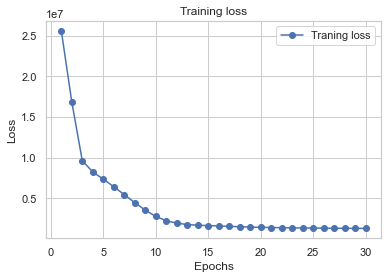

In [194]:
history_dict = history.history
loss = history_dict['loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Traning loss', marker='o')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [198]:
Y_pred = model.predict(X).reshape(-1)

result = pd.DataFrame({'Y_pred':Y_pred, 'Y_actual':Y_actual})
result.head()

,Y_pred,Y_actual
0,307.508698,354
1,290.829102,404
2,449.366028,553
3,626.850586,553
4,802.177307,553


In [199]:
r_squared =result[['Y_pred', 'Y_actual']].corr()**2

In [200]:
print("R^2 =", r_squared.iloc[1,0])

R^2 = 0.9012146041254688


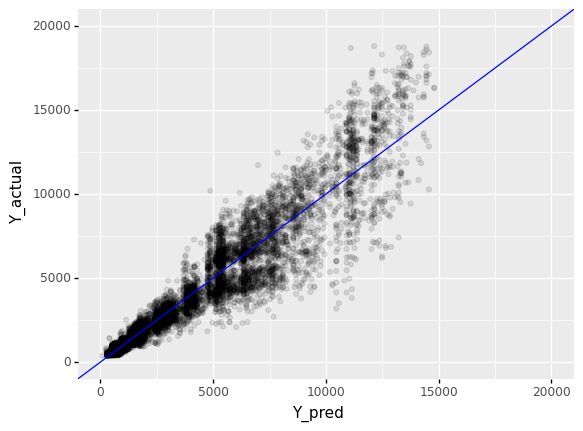

<ggplot: (-9223371864102973224)>

In [202]:
(ggplot(result, aes(x='Y_pred', y='Y_actual')) \
        +geom_point(alpha=0.1)
        +geom_abline(slope =1, intercept =0, size= 0.5, color='blue')
        +coord_cartesian(xlim =[0,20000], ylim = [0,20000])
         )